In [1]:
import pandas as pd
import matplotlib.pyplot as plt


url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'


df = pd.read_csv(url, sep=';', encoding='utf-8')
df.columns = df.columns.str.strip()

print(df.head())

print(df.info())

# Agrupar por tipo e calcular médias
print(df.groupby('Tipo').mean(numeric_only=True))
print(df.groupby('Tipo')[['Valor']].mean().sort_values('Valor'))

                      Tipo           Bairro  Quartos  Vagas  Suites  Area  \
0                Quitinete       Copacabana        1      0       0    40   
1                     Casa  Jardim Botânico        2      0       1   100   
2  Conjunto Comercial/Sala  Barra da Tijuca        0      4       0   150   
3              Apartamento           Centro        1      0       0    15   
4              Apartamento     Higienópolis        1      0       0    48   

    Valor  Condominio    IPTU  
0  1700.0       500.0    60.0  
1  7000.0         NaN     NaN  
2  5200.0      4020.0  1111.0  
3   800.0       390.0    20.0  
4   800.0       230.0     NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32960 entries, 0 to 32959
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Tipo        32960 non-null  object 
 1   Bairro      32960 non-null  object 
 2   Quartos     32960 non-null  int64  
 3   Vagas       32960 non-null 

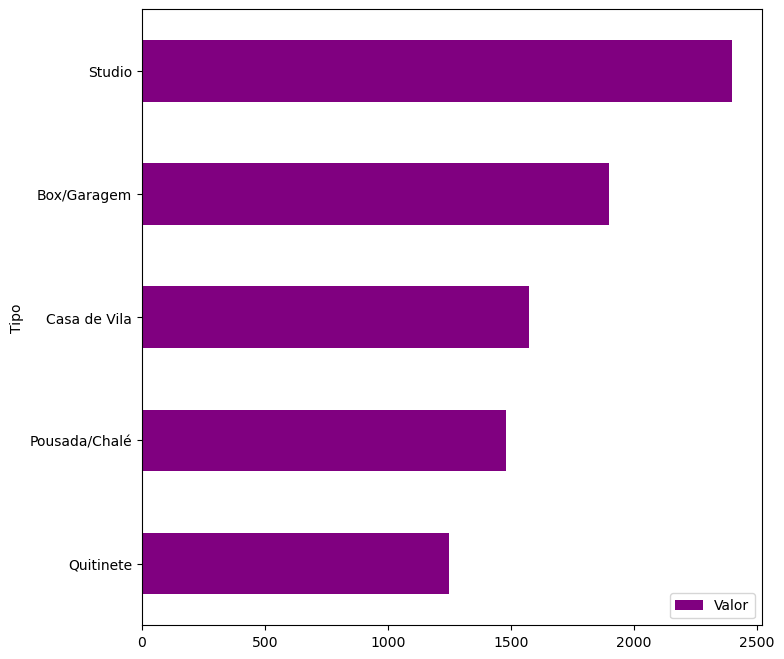

In [3]:
# Motivos de lentidão na maquina só plotar 5 dados do csv

df_tipo_preço = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

df_tipo_preço.head(5).plot(kind='barh', figsize=(8, 8), color='purple')
plt.show()


In [5]:
print(df.Tipo.unique())

['Quitinete' 'Casa' 'Conjunto Comercial/Sala' 'Apartamento'
 'Casa de Condomínio' 'Prédio Inteiro' 'Flat' 'Loja/Salão'
 'Galpão/Depósito/Armazém' 'Casa Comercial' 'Casa de Vila'
 'Terreno Padrão' 'Box/Garagem' 'Loft' 'Loja Shopping/ Ct Comercial'
 'Chácara' 'Loteamento/Condomínio' 'Sítio' 'Pousada/Chalé' 'Studio'
 'Hotel' 'Indústria']


In [6]:
imoveis_comerciais = ['Conjunto Comercial/Sala', 
                      'Prédio Inteiro', 'Loja/Salão', 
                      'Galpão/Depósito/Armazém', 
                      'Casa Comercial', 'Terreno Padrão',
                      'Loja Shopping/ Ct Comercial',
                      'Box/Garagem', 'Chácara',
                      'Loteamento/Condomínio', 'Sítio',
                      'Pousada/Chalé', 'Hotel', 'Indústria']

In [7]:
df.query('@imoveis_comerciais in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
9,Conjunto Comercial/Sala,Centro,0,3,0,695,35000.0,19193.0,3030.0
16,Prédio Inteiro,Botafogo,0,0,0,536,28000.0,NaN,3563.0
26,Conjunto Comercial/Sala,São Cristóvão,0,1,0,25,1100.0,600.0,NaN
29,Loja/Salão,Campo Grande,0,1,0,35,1300.0,950.0,NaN
...,...,...,...,...,...,...,...,...,...
32942,Conjunto Comercial/Sala,Barra da Tijuca,0,1,0,55,2000.0,1096.0,NaN
32946,Conjunto Comercial/Sala,Centro,0,0,0,140,4000.0,1412.0,496.0
32948,Conjunto Comercial/Sala,Centro,0,0,0,32,600.0,1035.0,83.0
32954,Box/Garagem,Centro,0,0,0,755,14000.0,NaN,NaN


In [9]:
df.query('@imoveis_comerciais not in Tipo')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
32953,Apartamento,Méier,2,0,0,70,900.0,490.0,48.0
32955,Quitinete,Centro,0,0,0,27,800.0,350.0,25.0
32956,Apartamento,Jacarepaguá,3,1,2,78,1800.0,800.0,40.0
32957,Apartamento,São Francisco Xavier,2,1,0,48,1400.0,509.0,37.0


In [11]:
df = df.query('@imoveis_comerciais not in Tipo')
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN


In [13]:
print(df.Tipo.unique())

['Quitinete' 'Casa' 'Apartamento' 'Casa de Condomínio' 'Flat'
 'Casa de Vila' 'Loft' 'Studio']


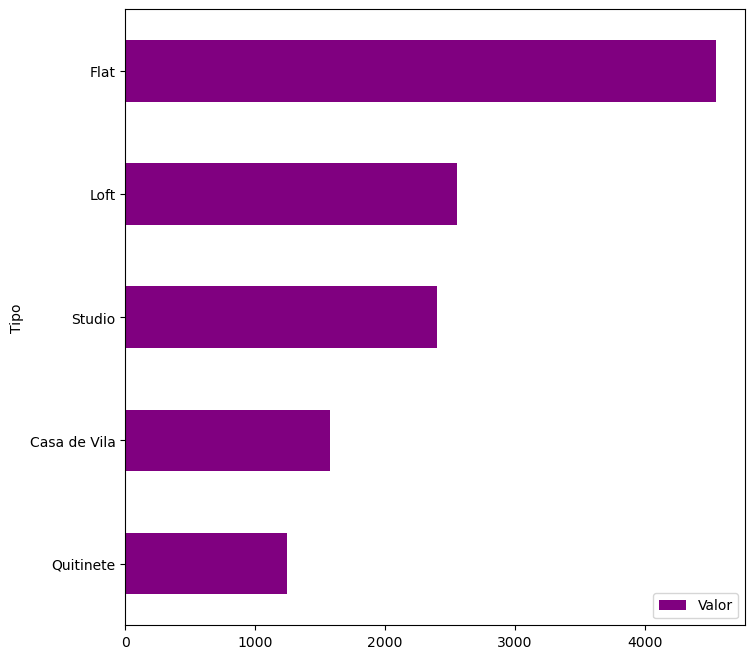

In [14]:
df_tipo_preço = df.groupby('Tipo')[['Valor']].mean().sort_values('Valor')

df_tipo_preço.head(5).plot(kind='barh', figsize=(8, 8), color='purple')
plt.show()

In [15]:
df_percentual_tipo = df['Tipo'].value_counts(normalize=True).to_frame().sort_values('proportion')

In [17]:
print(df.Tipo.value_counts())

Tipo
Apartamento           19532
Casa de Condomínio      996
Casa                    967
Quitinete               836
Flat                    476
Casa de Vila            249
Loft                     51
Studio                    4
Name: count, dtype: int64


In [18]:
print(df.Tipo.value_counts(normalize=True))

Tipo
Apartamento           0.845139
Casa de Condomínio    0.043096
Casa                  0.041842
Quitinete             0.036173
Flat                  0.020596
Casa de Vila          0.010774
Loft                  0.002207
Studio                0.000173
Name: proportion, dtype: float64


In [19]:
print(df.Tipo.value_counts(normalize=True).to_frame())

                    proportion
Tipo                          
Apartamento           0.845139
Casa de Condomínio    0.043096
Casa                  0.041842
Quitinete             0.036173
Flat                  0.020596
Casa de Vila          0.010774
Loft                  0.002207
Studio                0.000173


In [20]:
print(df['Tipo'].value_counts(normalize=True).to_frame().sort_values('Tipo'))

                    proportion
Tipo                          
Apartamento           0.845139
Casa                  0.041842
Casa de Condomínio    0.043096
Casa de Vila          0.010774
Flat                  0.020596
Loft                  0.002207
Quitinete             0.036173
Studio                0.000173


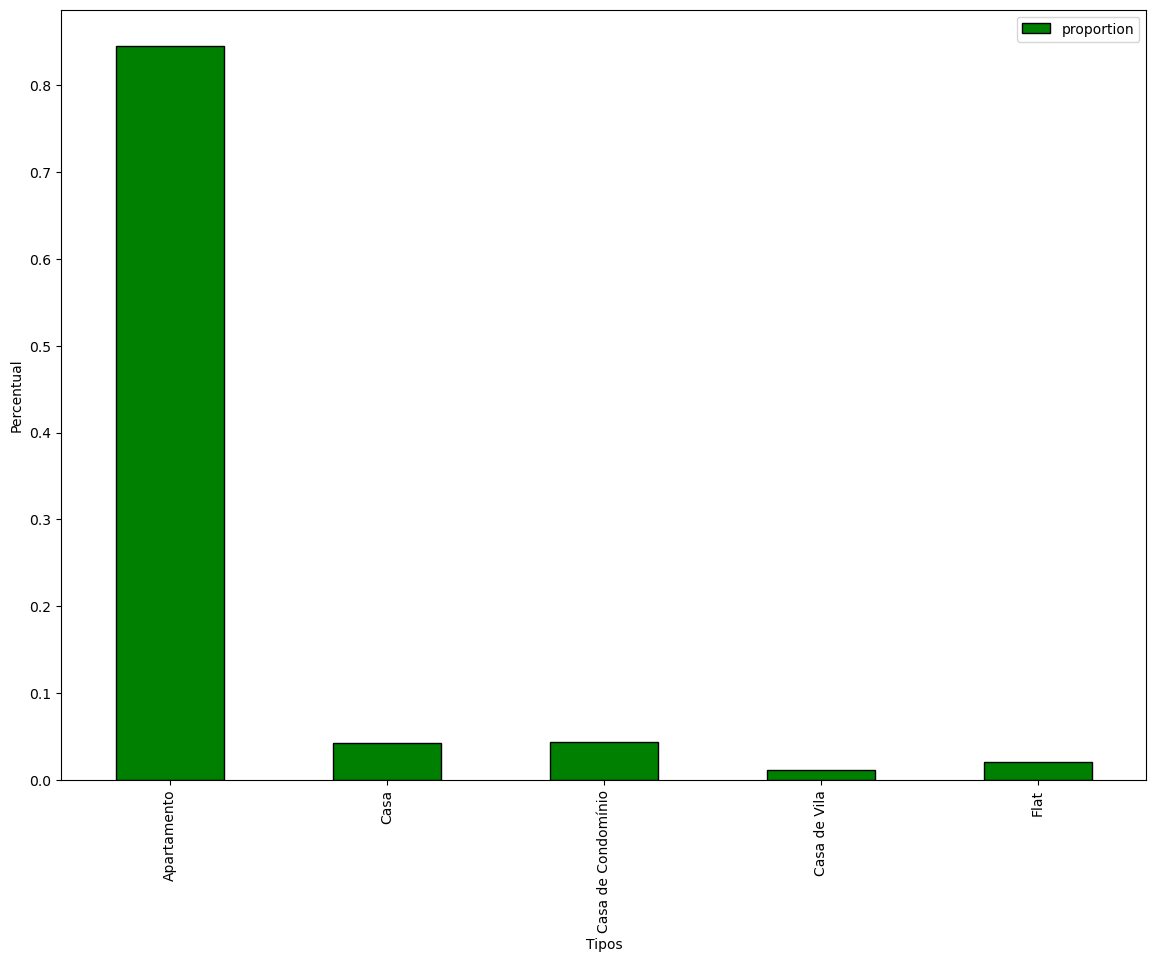

In [21]:
df_percentual_tipo = df['Tipo'].value_counts(normalize=True).to_frame().sort_values('Tipo')

df_percentual_tipo.head(5).plot(kind='bar', figsize=(14, 10), color ='green', edgecolor='black',
                        xlabel = 'Tipos', ylabel = 'Percentual');

In [24]:
df = df.query('Tipo == "Apartamento"')
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
5,Apartamento,Vista Alegre,3,1,0,70,1200.0,NaN,NaN
6,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN


In [25]:
df.isnull().sum()

Tipo             0
Bairro           0
Quartos          0
Vagas            0
Suites           0
Area             0
Valor            7
Condominio     745
IPTU          5472
dtype: int64

In [27]:
print(df.fillna(0))

              Tipo                Bairro  Quartos  Vagas  Suites  Area  \
3      Apartamento                Centro        1      0       0    15   
4      Apartamento          Higienópolis        1      0       0    48   
5      Apartamento          Vista Alegre        3      1       0    70   
6      Apartamento              Cachambi        2      0       0    50   
10     Apartamento                Centro        1      0       0    36   
...            ...                   ...      ...    ...     ...   ...   
32951  Apartamento        Vila Valqueire        2      0       0    52   
32953  Apartamento                 Méier        2      0       0    70   
32956  Apartamento           Jacarepaguá        3      1       2    78   
32957  Apartamento  São Francisco Xavier        2      1       0    48   
32958  Apartamento                Leblon        2      0       0    70   

        Valor  Condominio  IPTU  
3       800.0       390.0  20.0  
4       800.0       230.0   0.0  
5      12

In [29]:
df.query('Valor == 0 | Condominio == 0')

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU


In [30]:
df.query('Valor == 0 | Condominio == 0').index

Index([], dtype='int64')

In [31]:
print(df.head())

           Tipo        Bairro  Quartos  Vagas  Suites  Area   Valor  \
3   Apartamento        Centro        1      0       0    15   800.0   
4   Apartamento  Higienópolis        1      0       0    48   800.0   
5   Apartamento  Vista Alegre        3      1       0    70  1200.0   
6   Apartamento      Cachambi        2      0       0    50  1300.0   
10  Apartamento        Centro        1      0       0    36  1200.0   

    Condominio  IPTU  
3        390.0  20.0  
4        230.0   NaN  
5          NaN   NaN  
6        301.0  17.0  
10         NaN   NaN  


In [34]:
print(df.head()['Quartos'] == 1)

3      True
4      True
5     False
6     False
10     True
Name: Quartos, dtype: bool


In [36]:
selecao1 = df['Quartos'] == 1

In [37]:
selecao1 = df['Quartos'] == 1
df[selecao1].head(5)

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
10,Apartamento,Centro,1,0,0,36,1200.0,NaN,NaN
13,Apartamento,Copacabana,1,0,1,40,2000.0,561.0,50.0
28,Apartamento,Tijuca,1,0,0,48,750.0,772.0,25.0


In [38]:
selecao2 = df['Valor'] < 1200
df[selecao2].head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
19,Apartamento,Freguesia (Jacarepaguá),3,0,0,54,950.0,300.0,28.0
23,Apartamento,Olaria,3,1,0,68,1000.0,670.0,NaN
28,Apartamento,Tijuca,1,0,0,48,750.0,772.0,25.0


In [39]:
selecao_final = (selecao1) & (selecao2)

In [40]:
selecao_final = (selecao1) & (selecao2)
df[selecao_final].head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN
28,Apartamento,Tijuca,1,0,0,48,750.0,772.0,25.0
54,Apartamento,Centro,1,0,0,27,750.0,371.0,19.0
94,Apartamento,Centro,1,1,0,37,1100.0,540.0,900.0


In [41]:
df_1 = df[selecao_final]

In [42]:
selecao = (df['Quartos'] >= 2) & (df['Valor'] < 3000) & (df['Area'] > 70)

In [43]:
selecao = (df['Quartos'] >= 2) & (df['Valor'] < 3000) & (df['Area'] > 70)
df[selecao]

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
12,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0
21,Apartamento,Tijuca,2,1,0,110,1900.0,700.0,138.0
24,Apartamento,Tijuca,2,1,0,78,2000.0,700.0,NaN
32,Apartamento,Botafogo,2,1,0,76,2500.0,740.0,NaN
36,Apartamento,Recreio dos Bandeirantes,3,1,1,105,2300.0,648.0,NaN
...,...,...,...,...,...,...,...,...,...
32934,Apartamento,Jacarepaguá,2,1,1,78,2200.0,790.0,180.0
32940,Apartamento,Barra da Tijuca,2,1,1,85,2250.0,1561.0,197.0
32941,Apartamento,Barra da Tijuca,3,2,0,98,2300.0,887.0,177.0
32944,Apartamento,Recreio dos Bandeirantes,3,2,1,88,1550.0,790.0,NaN


In [44]:
df_2 = df[selecao] 

In [46]:
df.to_csv('dados_apartamentos.csv', index=False, sep=';')

pd.read_csv('dados_apartamentos.csv')

,Tipo;Bairro;Quartos;Vagas;Suites;Area;Valor;Condominio;IPTU
0,Apartamento;Centro;1;0;0;15;800.0;390.0;20.0
1,Apartamento;Higienópolis;1;0;0;48;800.0;230.0;
2,Apartamento;Vista Alegre;3;1;0;70;1200.0;;
3,Apartamento;Cachambi;2;0;0;50;1300.0;301.0;17.0
4,Apartamento;Centro;1;0;0;36;1200.0;;
...,...
19527,Apartamento;Vila Valqueire;2;0;0;52;1000.0;550.0;
19528,Apartamento;Méier;2;0;0;70;900.0;490.0;48.0
19529,Apartamento;Jacarepaguá;3;1;2;78;1800.0;800.0;...
19530,Apartamento;São Francisco Xavier;2;1;0;48;1400...


In [50]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
dados = pd.read_csv(url, sep=';')
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [51]:
dados.fillna(0,inplace = True)
dados['Valor_por_mes'] = dados['Valor'] + dados['Condominio']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0


In [53]:
dados['Descricao'] = dados['Tipo'] + ' em ' + dados['Bairro']
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,Quitinete em Copacabana
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,Casa em Jardim Botânico
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,Conjunto Comercial/Sala em Barra da Tijuca
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,Apartamento em Centro
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,Apartamento em Higienópolis


In [54]:
dados['Descricao'] = dados['Tipo'] + ' em ' + dados['Bairro'] + ' com ' + \
                                        dados['Quartos'].astype(str) + ' quarto(s) ' + \
                                        ' e ' + dados['Vagas'].astype(str) + ' vaga(s) de garagem.'
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor_por_mes,Descricao
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0,2200.0,Quitinete em Copacabana com 1 quarto(s) e 0 v...
1,Casa,Jardim Botânico,2,0,1,100,7000.0,0.0,0.0,7000.0,Casa em Jardim Botânico com 2 quarto(s) e 0 v...
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0,9220.0,Conjunto Comercial/Sala em Barra da Tijuca com...
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,1190.0,Apartamento em Centro com 1 quarto(s) e 0 vag...
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,1030.0,Apartamento em Higienópolis com 1 quarto(s) e...
